In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
import argparse
import sys,os
from sklearn import preprocessing

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Importando os dados e gerando a matriz resultado

In [2]:
## Importando os dados

dir = "/content/gdrive/My Drive/"
dir_local = os.getcwd() # path para rodar em máquina local ao invés do colab

kar = pd.read_csv(os.path.join(dir,'data/mfeat-kar'),  delim_whitespace=True, header= None)
fou = pd.read_csv(os.path.join(dir,'data/mfeat-fou'),  delim_whitespace=True, header= None)
fac = pd.read_csv(os.path.join(dir,'data/mfeat-fac'),  delim_whitespace=True, header= None)


In [3]:
# Criando as classes para o dataset

finais = []
for i in [kar]:
  # Separando as classes
  c_200 = i[0:200]
  c_400 = i[200:400]
  c_600 = i[400:600]
  c_800 = i[600:800]
  c_1000 = i[800:1000]
  c_1200 = i[1000:1200]
  c_1400 = i[1200:1400]
  c_1600 = i[1400:1600]
  c_1800 = i[1600:1800]
  c_2000 = i[1800:2000]

  # Atribuindo as classes
  c_200["class"] = 0
  c_400["class"] = 1
  c_600["class"] = 2
  c_800["class"] = 3
  c_1000["class"] = 4
  c_1200["class"] = 5
  c_1400["class"] = 6
  c_1600["class"] = 7
  c_1800["class"] = 8
  c_2000["class"] = 9

  # juntando o dataset novamente
  lista_datasets = [c_400,c_600,c_800,c_1000,c_1200,c_1400,c_1600,c_1800,c_2000]
  final = c_200
  for j in lista_datasets:
    final = final.append(j)
 # salvando datasets finais
  finais.append(final)

kar_final = finais[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [4]:
table_results = pd.DataFrame()
table_results["partition"] = kar_final["class"]
table_results["instance"] = kar_final.index
table_results["instance"] = table_results["instance"] + 1


table_results.set_index('instance', inplace= True)

table_results.sort_index(inplace=True)

In [5]:
table_results

,partition
instance,
1,0
2,0
3,0
4,0
5,0
...,...
1996,9
1997,9
1998,9


## Importando partições crisp

In [6]:
y_kar = pd.read_csv(os.path.join(dir,'data/y_kar.csv'), sep=";")
y_fou = pd.read_csv(os.path.join(dir,'data/y_fou.csv'), sep=";")
y_fac = pd.read_csv(os.path.join(dir,'data/y_fac.csv'), sep=";")

y_kar.set_index('instance', inplace= True)
y_fou.set_index('instance', inplace= True)
y_fac.set_index('instance', inplace= True)

y_kar.sort_index(inplace=True)
y_fou.sort_index(inplace=True)
y_fac.sort_index(inplace=True)

y_fac

,partition
instance,
1,5
2,5
3,5
4,5
5,5
...,...
1996,9
1997,1
1998,1


## Índice de Rand Corrigido

In [7]:
from sklearn.metrics import adjusted_rand_score


# kar
kar_rand = adjusted_rand_score(table_results["partition"], y_kar["partition"])
# fou
fou_rand = adjusted_rand_score(table_results["partition"], y_fou["partition"])
# fac
fac_rand = adjusted_rand_score(table_results["partition"], y_fac["partition"])



print("Índice de Rand Corrigido")
print("kar: ", kar_rand)
print("fou: ", fou_rand)
print("fac: ", fac_rand)


Índice de Rand Corrigido
kar:  0.19568019163639314
fou:  0.1724784187969813
fac:  0.44049672931206224


## F-Measure

In [8]:
from sklearn.metrics import f1_score

# kar
kar_f1 = f1_score(table_results["partition"], y_kar["partition"], average='weighted')
# fou
fou_f1 = f1_score(table_results["partition"], y_fou["partition"], average='weighted')
# fac
fac_f1 = f1_score(table_results["partition"], y_fac["partition"], average='weighted')

print("F-Measure")
print("kar: ", kar_f1)
print("fou: ", fou_f1)
print("fac: ", fac_f1)

F-Measure
kar:  0.0844735681370224
fou:  0.10654205663321853
fac:  0.21156578506503093


## Classification Report

In [9]:
from sklearn.metrics import classification_report

# kar
kar_c = classification_report(table_results["partition"], y_kar["partition"])
# fou
fou_c = classification_report(table_results["partition"], y_fou["partition"])
# fac
fac_c = classification_report(table_results["partition"], y_fac["partition"])


### kar

In [10]:
print(kar_c)

              precision    recall  f1-score   support

           0       0.24      0.26      0.25       200
           1       0.15      0.28      0.20       200
           2       0.01      0.01      0.01       200
           3       0.02      0.01      0.01       200
           4       0.05      0.04      0.04       200
           5       0.07      0.05      0.06       200
           6       0.29      0.12      0.17       200
           7       0.00      0.01      0.00       200
           8       0.02      0.04      0.03       200
           9       0.10      0.06      0.07       200

    accuracy                           0.09      2000
   macro avg       0.10      0.09      0.08      2000
weighted avg       0.10      0.09      0.08      2000



### fou

In [11]:
print(fou_c)

              precision    recall  f1-score   support

           0       0.08      0.08      0.08       200
           1       0.06      0.08      0.07       200
           2       0.30      0.12      0.17       200
           3       0.11      0.12      0.12       200
           4       0.16      0.09      0.11       200
           5       0.15      0.18      0.16       200
           6       0.30      0.40      0.34       200
           7       0.00      0.00      0.00       200
           8       0.01      0.01      0.01       200
           9       0.01      0.01      0.01       200

    accuracy                           0.11      2000
   macro avg       0.12      0.11      0.11      2000
weighted avg       0.12      0.11      0.11      2000



### fac

In [12]:
print(fac_c)

              precision    recall  f1-score   support

           0       0.09      0.04      0.06       200
           1       0.53      0.64      0.58       200
           2       0.63      0.85      0.72       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00       200
           5       0.04      0.04      0.04       200
           6       0.00      0.00      0.00       200
           7       0.57      0.73      0.64       200
           8       0.01      0.01      0.01       200
           9       0.07      0.07      0.07       200

    accuracy                           0.24      2000
   macro avg       0.19      0.24      0.21      2000
weighted avg       0.19      0.24      0.21      2000



## Matriz de Confusão

### kar

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


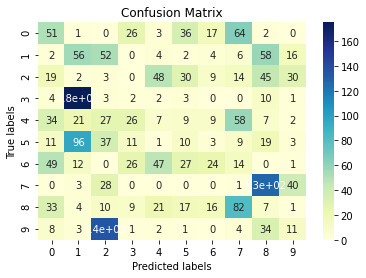

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix     

cm = confusion_matrix(table_results["partition"], y_kar["partition"])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

### fou

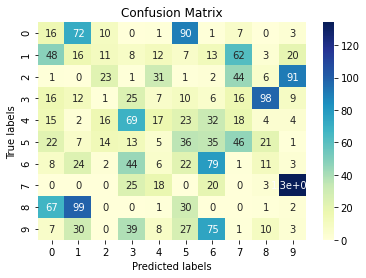

In [14]:
cm = confusion_matrix(table_results["partition"], y_fou["partition"])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

### fac

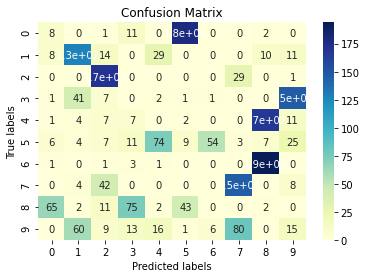

In [15]:
cm = confusion_matrix(table_results["partition"], y_fac["partition"])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 